## In this notebook we will implement Random Forrest and XGBoost algorithms to model ride distances

In [11]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt

In [2]:
bike = pd.read_csv('bike_features_final.csv')

/tmp/ipykernel_276/1740552796.py:1: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  bike = pd.read_csv('bike_features_final.csv')


In [3]:
variables= ["member_casual","weekend_weekday","ride_length_seconds","with_friend","ride_type","time_of_day","speed_kmh"]
bike_vars = bike[variables]

In [4]:
y = bike.Dist
x_train, x_test, y_train, y_test = train_test_split(bike_vars, y, test_size=0.3,random_state=1)
x_train=pd.get_dummies(x_train, drop_first=True)
x_test=pd.get_dummies(x_test, drop_first=True)

In [17]:
params = {
 "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma" : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

### Implement random search to find best parameters

In [18]:
xg_reg = xgb.XGBRegressor()
rs_model=RandomizedSearchCV(xg_reg,param_distributions=params,n_iter=5,scoring=None,cv=5,verbose=3,n_jobs=-1)

In [19]:
rs_model.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas

KeyboardInterrupt: 

In [13]:
rs_model.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             gamma=0.2, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=7, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [20]:
#best model
regressor = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             gamma=0.2, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=7, missing=np.nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [21]:
regressor.fit(x_train,y_train)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             gamma=0.2, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=7, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [22]:
preds = regressor.predict(x_test)

In [23]:
errors = abs(preds - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 4))

Mean Absolute Error: 0.0525


In [8]:
rf = RandomForestRegressor(n_jobs=-1)

In [5]:
random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

In [9]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring="neg_mean_squared_error", n_iter = 3, cv=3, verbose=2, random_state=1)

In [10]:
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=230; total time= 4.8min
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=230; total time= 4.8min
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=230; total time= 4.7min


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=180; total time= 5.6min


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=180; total time= 5.4min


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=180; total time= 5.4min


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=180; total time= 7.8min


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=180; total time= 7.8min


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=180; total time= 7.9min


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1), n_iter=3,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [130, 180, 230]},
                   random_state=1, scoring='neg_mean_squared_error', verbose=2)

In [11]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=50, max_features='auto', min_samples_leaf=4,
                      n_estimators=180, n_jobs=-1)

In [5]:
rf=RandomForestRegressor(max_depth=50, max_features='auto', min_samples_leaf=4,
                      n_estimators=180, n_jobs=-1)

In [6]:
rf.fit(x_train,y_train)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=50, max_features='auto', min_samples_leaf=4,
                      n_estimators=180, n_jobs=-1)

In [27]:
predsRF = rf.predict(x_test)

In [8]:
errors = abs(preds - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 4))

Mean Absolute Error: 0.0011


### Actual vs Predicted plots for XGBoost Algorithm and Random Forrest

### We can see how the predicted values are different from the actual values. The predictions are underestimated for longer ride lengths when implementing XGBoost while the tree-based Random Forrest algorithm fits the data much better. The boosting algothims has large residuals for longer ride lenghts just like with the regression model

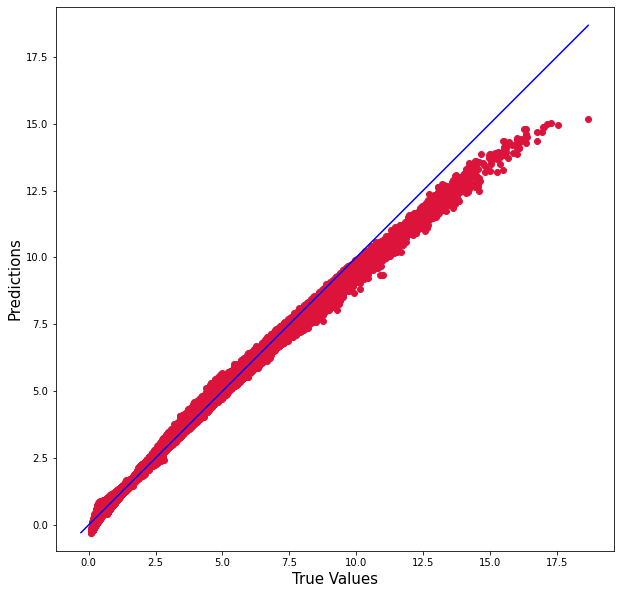

In [31]:
## XGB plot (pred vs actual)
plt.figure(figsize=(10,10))
plt.scatter(y_test, preds, c='crimson')

p1 = max(max(preds), max(y_test))
p2 = min(min(preds), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

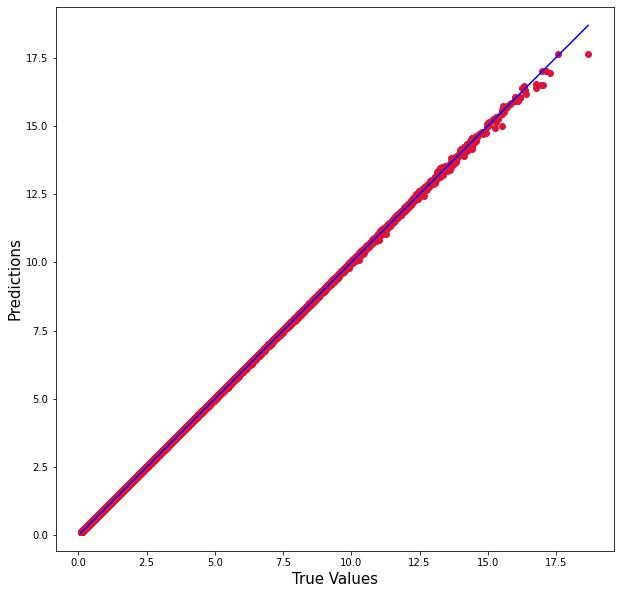

In [30]:
## Random forrest plot (pred vs actual)
plt.figure(figsize=(10,10))
plt.scatter(y_test, predsRF, c='crimson')

p1 = max(max(predsRF), max(y_test))
p2 = min(min(predsRF), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()